###### TELECOM CUSTOMER CHURN PREDICTION.


# INTRODUCTION


> 1.**What is Customer Churn** ?

> Customer churn refers to the phenomenon where customers stop doing business with a company or        service provider.

> So, usually it is more like availing the subscription of a firm and suddenly discontinuing the service for any reason.

> Customer in the telecom industry has a variety of options for choosing a firm and simultaneosly switching from one industry to another industry if the choosed firm doesn't compel user's standard.

> 2.**Why to reduce Customer Churn** ?

> By reducing customer churn ,these firms will solidify their position,continue to grow and satisfy customer's standard. The greater the number of customers in their network, the lower the startup costs and the higher the profits. Therefore, the company prioritizes minimizing customer attrition and implementing effective retention strategies to ensure success.

> 3.**Objective of the Project :**

> The primary goal of this project is to **predict customer churn**—that is, to determine which customers are likely to stop using a service based on their historical data and behavioral patterns.

>4.**My KEY Findings Includes :**

>* In this project, i had analyzed data on customer demographics, service usage, past behaviors and visualized the relationship between features of the firm and the churned customers.

>* **Visualization Includes :**
> 1. Which of the customers are more likely to churn(Male,Female) ?
> 2. What is the percentage of Churn Customers and active customers ?
> 3. Does the Internet sevice firm became a concern for the Churned Customers ?
> 4. Which of the customers are more likely to churn Existing or Newly joined ?
> 5. Does Monthly charges became a concern for churned users ?
> 6. Does the churned customers had to pay high total charges ?
> 7. Does Online Security and Online backup is a concern for the churned users ?
> 8. Does phone service feature, a concern for the churned customers ?
> 9. Does tech support feature, a concern for the churned customers ?
> 10.  Does service contracts reduce active customers ?
> 11.  What type of users usually become in-active ?
> 12.  Who have more partners(Male/female) and Is users with partners are more likely to churn or           not having any partner ?
> 13.  Most used Payment Method by the churned users ?

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Data Collection.

In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Cleaning.

In [7]:
df=df.drop(['customerID'],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Manipulation.

* **gender**

In [8]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

> GENDER has definite values.

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 * **Senior Citizen**

In [10]:
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df['SeniorCitizen'].isnull().sum()

0

In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* **Partner**

In [14]:
df['Partner'].isnull().sum()

0

In [15]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* **Dependents**

In [17]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* **Tenure**

In [19]:
df.rename(columns={'tenure':'Tenure'},inplace=True)

In [20]:
df['Tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [21]:
df[df['Tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [22]:
df.drop(labels=df[df['Tenure']==0].index,axis=0,inplace=True)
df[df['Tenure']==0].index

Index([], dtype='int64')

In [23]:
df.shape

(7032, 20)

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* **ALL THE SERVICES AVAILED BY THE USERS(COLUMNS)**

In [25]:
a=df['PhoneService'].unique()
print(a)
b=df['MultipleLines'].unique()
print(b)
c=df['InternetService'].unique()
print(c)
d=df['OnlineSecurity'].unique()
print(d)
e=df['OnlineBackup'].unique()
print(e)
f=df['DeviceProtection'].unique()
print(f)
g=df['TechSupport'].unique()
print(g)
h=df['StreamingTV'].unique()
print(h)
i=df['StreamingMovies'].unique()
print(i)

['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* **TotalCharges column check**

In [27]:
print(df['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [28]:
def handle_total_charges(value):
    return float(value)

# Apply the function to the 'TotalCharges' column
df['TotalCharges'] = df['TotalCharges'].apply(handle_total_charges)

# Check the unique values in the 'TotalCharges' column
print(df['TotalCharges'].unique())


[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [29]:
df[df['TotalCharges']==0].index

Index([], dtype='int64')

* **Contract and Billing methods**

In [30]:
x=df['Contract'].unique()
print(x)
y=df['PaymentMethod'].unique()
print(y)
z=df[df['MonthlyCharges']==0].index
print(z)
b=df['Churn'].unique()
print(b)

['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Index([], dtype='int64')
['No' 'Yes']


In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


**ALL COLUMNS CLEANED**

# Data Visualization

**Customer churn w.r.t Gender**
* **Which of the customers are more likely to churn(Male,Female) ?**

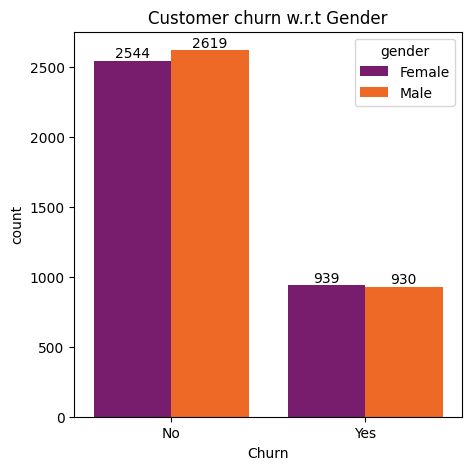

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='Churn',data=df,hue='gender',palette='inferno',saturation=200)

for p in plt.gca().patches:  
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),ha='center',va='bottom')

plt.title('Customer churn w.r.t Gender')
plt.show()
    

> Conclusion --> **This shows that both the male and female customers equally stops using the service with a negligible difference between the numbers.**

 **Churned Customers vs Active Customers**

* **What is the percentage of Churn Customers and active customers ?**

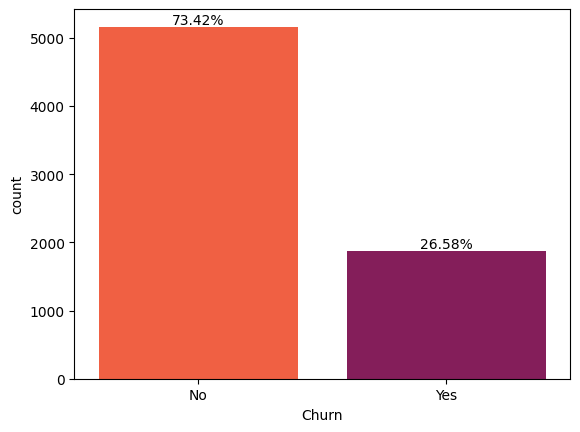

In [34]:
sns.countplot(x='Churn',data=df,palette='rocket_r',saturation=100)


for p in plt.gca().patches:
    height=p.get_height()
    total=len(df)
    percentage=(height*100)/total
    plt.text(p.get_x() + p.get_width() / 2,height,f'{percentage:.2f}%',
             ha='center',va='bottom',label=True)
   
plt.show()

> Conclusion :

> **26.58% are Churned Customers.**

> **73.42% are Active Cutomers.**

**Most used internet service by the Churned Customers**

* **Does the Internet sevice firm became a concern for the Churned Customers ?** 

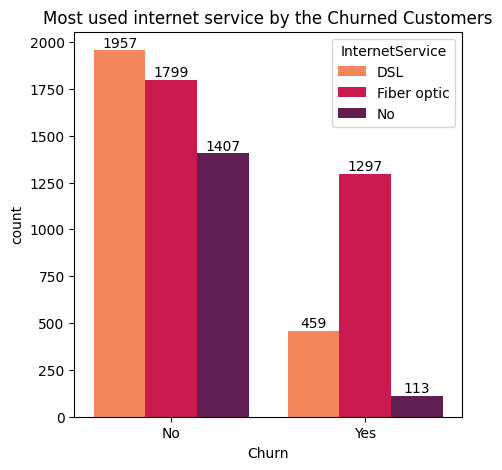

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x='Churn',data=df,hue='InternetService',palette='rocket_r',saturation=10)

for p in plt.gca().patches:  
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),ha='center',va='bottom')

plt.title('Most used internet service by the Churned Customers')
plt.show()
    

>CONCLUSION :

> **A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.**

> **Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.**

**Tenure of Existing Customers vs Newly Joined Customers.**
  
  * **Which of the customers are more likely to churn Existing or Newly joined ?**

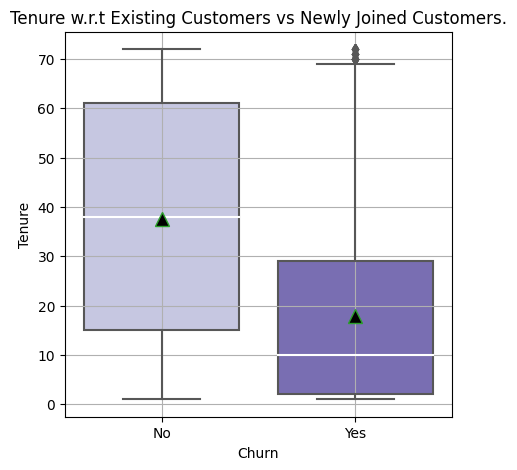

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Churn',y='Tenure',data=df,palette='Purples',
            showmeans=True,
            medianprops={'color':"white"},
            meanprops={'markerfacecolor':'black','markersize':10},saturation=100)
plt.title('Tenure w.r.t Existing Customers vs Newly Joined Customers.')

plt.grid()
plt.show()

>CONCLUSION :

> The **Lowest mean(small triangle)** in churned customers plot tells that the new customers are more likely to unsubscribe the firm/service.


In [37]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

**Monthly Charges w.r.t Active Users and Churned Users.**

 * **Does Monthly charges became a concern for churned users ?**

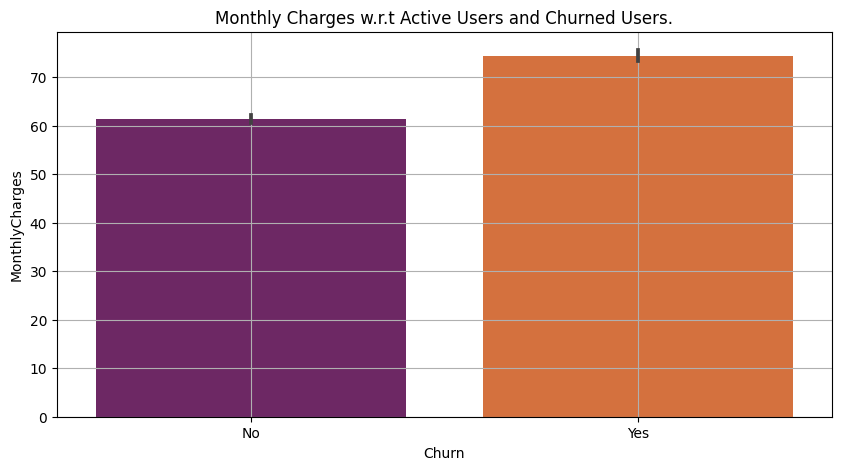

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x='Churn',y='MonthlyCharges',data=df,palette='inferno')
plt.title('Monthly Charges w.r.t Active Users and Churned Users.')

plt.grid()
plt.show()

>CONCLUSION :

> **The Churned Users has to pay high monthly charges.** 


**Total Charges w.r.t Active Users and Churned Users.**

 * **Does the churned customers had to pay high total charges ?**

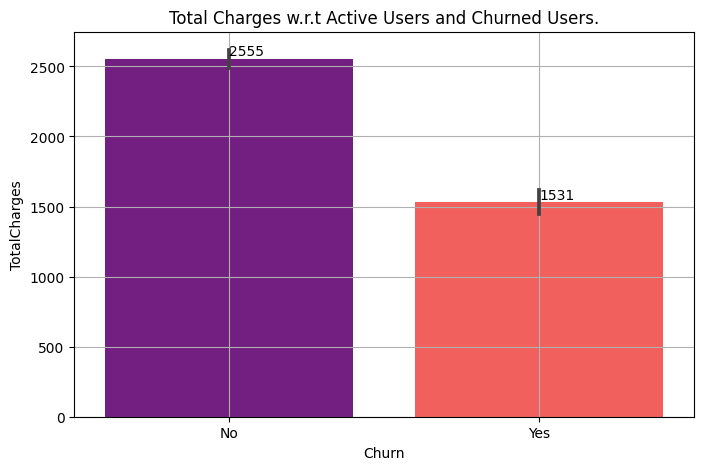

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x='Churn',y='TotalCharges',data=df,palette='magma',saturation=100)

for p in plt.gca().patches:
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),
             ha='left',va='bottom')

plt.title("Total Charges w.r.t Active Users and Churned Users.")

plt.grid()
plt.show()

>CONCLUSION :

> **The above plot suggest that, the churned customers had to pay less total charges since they were      discontinuing the service due to high monthly charges.**

**Senior Citizens vs noraml users interms of switching off the service**

 * **What type of users usually become in-active ?**

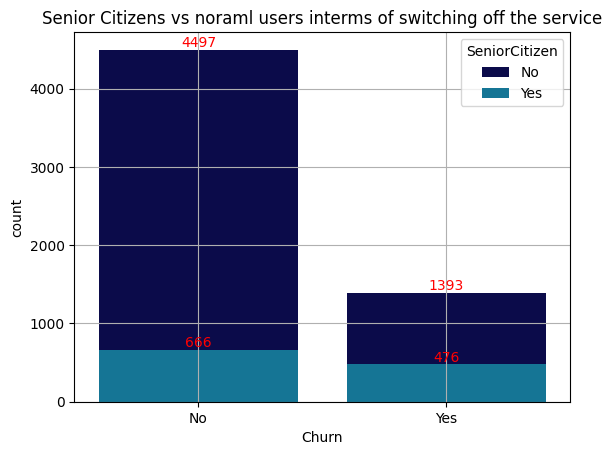

In [40]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=df,palette='ocean',dodge=False)

for p in plt.gca().patches:
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),
             ha='center',va='bottom',color='red')

plt.grid()
plt.title('Senior Citizens vs noraml users interms of switching off the service')
plt.show()

>CONCLUSION :

> **The above plot suggest that, out of the total users churned, most of the users are not senior citizens.**

**Partner w.r.t Churned users and Active Users.**

 * **Who have more partners(Male/female) and Is users with partners are more likely to churn or           not having any partner ?**

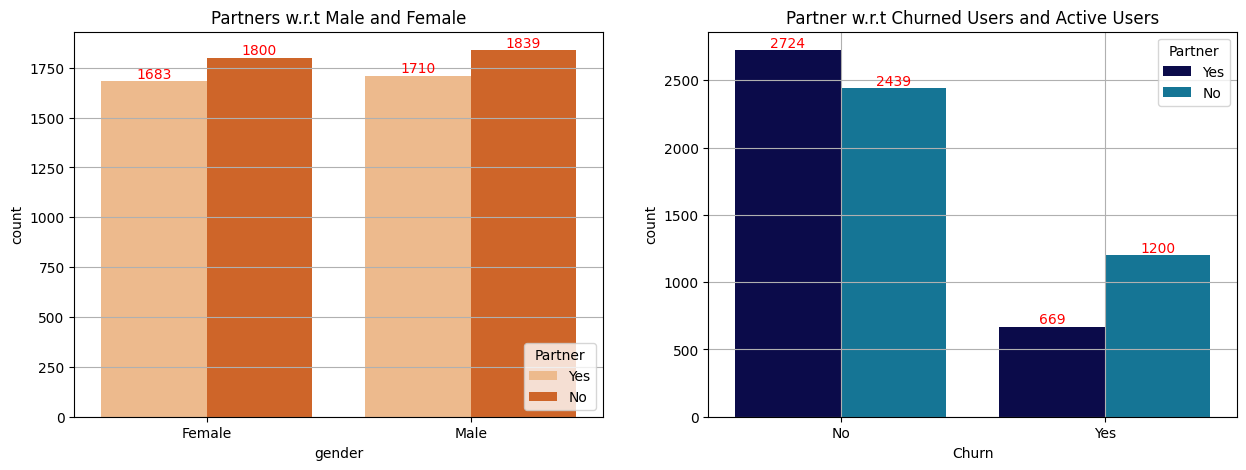

In [41]:
plt.figure(figsize=(15,5))

#plot 1
plt.subplot(1,2,1)

plt.grid()
plt.title('Partners w.r.t Male and Female')
sns.countplot(x='gender',hue='Partner',palette='Oranges',data=df)
for p in plt.gca().patches:
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),
             ha='center',va='bottom',color='red')

plt.legend(title='Partner',loc='lower right')


#plot 2
plt.subplot(1,2,2)
sns.countplot(x='Churn',hue='Partner',data=df,palette='ocean',dodge=True)

for p in plt.gca().patches:
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),
             ha='center',va='bottom',color='red')

plt.grid()
plt.title('Partner w.r.t Churned Users and Active Users')

plt.show()

>CONCLUSION :

> **The 1st plot suggest that, Male have 1710 partners and Female have 1683 partners.**

> **The 2nd plot suggest that, Users having no partners are more likely to churn.**

**Online Backup and Online Security**

 * **Does Online Security and Online backup is a concern for the churned users ?**

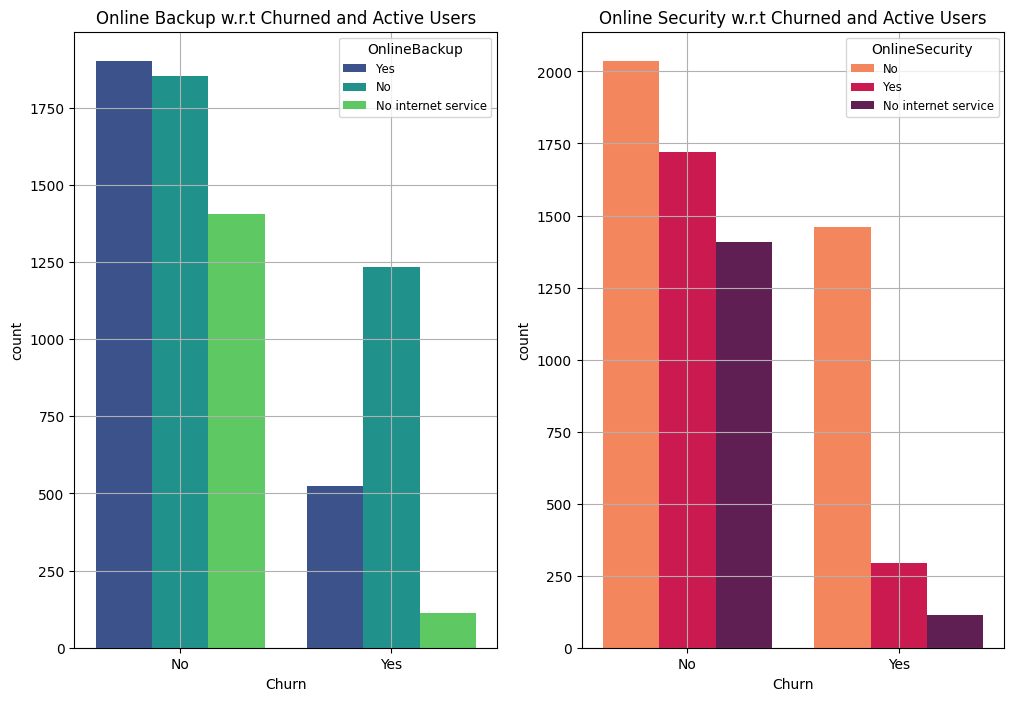

In [42]:
plt.figure(figsize=(12,8))

#plot 1
plt.subplot(1,2,1)
sns.countplot(x='Churn',hue='OnlineBackup',data=df,palette='viridis',dodge=True,saturation=10)
plt.title('Online Backup w.r.t Churned and Active Users')
plt.legend(title='OnlineBackup',loc='upper right',fontsize='small')
plt.grid()

#plot 2
plt.subplot(1,2,2)
sns.countplot(x='Churn',hue='OnlineSecurity',data=df,palette='rocket_r',dodge=True,saturation=10)
plt.title('Online Security w.r.t Churned and Active Users')
plt.legend(title='OnlineSecurity',loc='upper right',fontsize='small')
plt.grid()

plt.show()

>CONCLUSION :

> **Users with less online security are more likely to churn.**

> **Users with less online backup are more likely to churn.**

**Payment Method w.r.t Churned and Active Users**

 * **Most used Payment Method by the churned users ?**

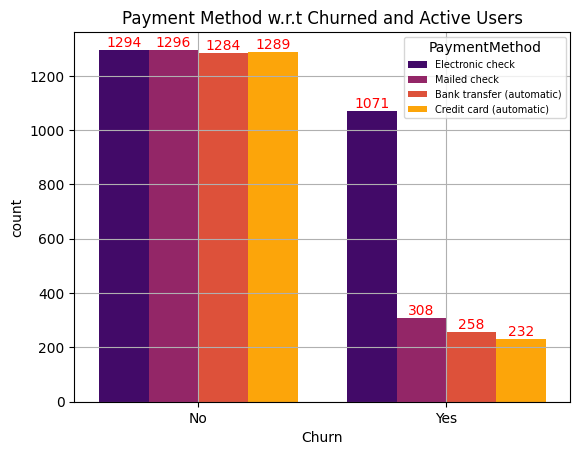

In [43]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df,palette='inferno',saturation=100)

for p in plt.gca().patches:
    height=p.get_height()
    plt.text(p.get_x()+p.get_width()/2,height,int(height),
             ha='center',va='bottom',color='red')

plt.title('Payment Method w.r.t Churned and Active Users')
plt.legend(title='PaymentMethod',fontsize=7)
plt.grid()
plt.show()

>CONCLUSION :

> **Users performing transactions through "Electronic Check Method" are more likely to churn.**

**Phone Service w.r.t Churned and Active Users**

 * **Does phone service feature, a concern for the churned customers ?**

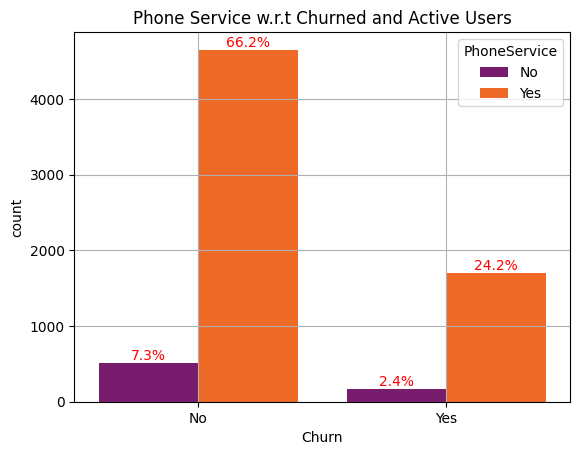

In [44]:
sns.countplot(x='Churn',hue='PhoneService',data=df,palette='inferno',saturation=100)

total=len(df)

for p in plt.gca().patches:
    height=p.get_height()
    percentage=(height*100)/total
    plt.text(p.get_x()+p.get_width()/2,height,f'{percentage:.1f}%',
             ha='center',va='bottom',color='red')

plt.gca().set(title='Phone Service w.r.t Churned and Active Users')

plt.grid()
plt.show()


>CONCLUSION :

> **Very few users don't use phone service ,so phone service is not a concern for the churned customers.**

**Tech Support w.r.t Churned and Active Users**

 * **Does tech support feature, a concern for the churned customers ?**

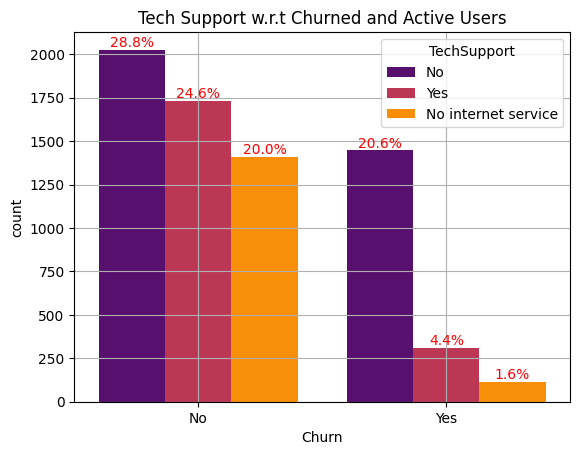

In [45]:
sns.countplot(x='Churn',hue='TechSupport',data=df,palette='inferno',saturation=100)

total=len(df)

for p in plt.gca().patches:
    height=p.get_height()
    percentage=(height*100)/total
    plt.text(p.get_x()+p.get_width()/2,height,f'{percentage:.1f}%',
             ha='center',va='bottom',color='red')

plt.gca().set(title='Tech Support w.r.t Churned and Active Users')

plt.grid()
plt.show()

>CONCLUSION :

> **Users with no tech support are more likely to Churn.**

**Contact w.r.t Churned and Active Users**

 * **Does service contracts reduce active customers ?**

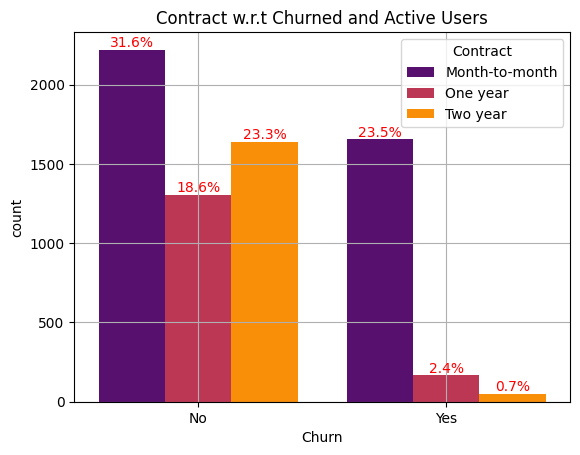

In [46]:
sns.countplot(x='Churn',hue='Contract',data=df,palette='inferno',saturation=100)

total=len(df)

for p in plt.gca().patches:
    height=p.get_height()
    percentage=(height*100)/total
    plt.text(p.get_x()+p.get_width()/2,height,f'{percentage:.1f}%',
             ha='center',va='bottom',color='red')

plt.gca().set(title='Contract w.r.t Churned and Active Users')

plt.grid()
plt.show()

>CONCLUSION :

> **Users with month_to_month contracts are more likely to Churn while users with one year and two year contracts are less likely to churn.**

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
df.shape

(7032, 20)

# Data Preprocessing.

> **We need to convert categorical columns to numeric values for model training.**

In [49]:
# Label encoding for binary columns
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['SeniorCitizen'] = LabelEncoder().fit_transform(df['SeniorCitizen'])
df['Partner'] = LabelEncoder().fit_transform(df['Partner'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df['PhoneService'] = LabelEncoder().fit_transform(df['PhoneService'])
df['PaperlessBilling'] = LabelEncoder().fit_transform(df['PaperlessBilling'])
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# for multi-class columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,No phone service,No,Yes,No,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,No,Yes,No,Yes,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,No,Yes,Yes,No,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,No phone service,Yes,No,Yes,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,No,No,No,No,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,Yes,No,Yes,...,True,False,False,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,Yes,No,Yes,Yes,...,False,True,False,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,No phone service,Yes,No,No,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,Yes,No,No,No,...,False,True,False,True,False,False,False,False,False,True


In [50]:
df.shape

(7032, 27)

> **Feature's column's encoding --> custom encoding is done here since it contains 3 categorical values.**

In [51]:
def custom_encode(column):
    return column.replace({'Yes': 1, 'No': 0, 'No internet service': 0})

# Custom encoding to relevant columns
columns_to_encode = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columns_to_encode:
    df[col] = custom_encode(df[col])

# Check the transformed data
print(df[columns_to_encode].head())


   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   
1               1             0                 1            0            0   
2               1             1                 0            0            0   
3               1             0                 1            1            0   
4               0             0                 0            0            0   

   StreamingMovies  
0                0  
1                0  
2                0  
3                0  
4                0  


In [52]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,No phone service,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,No,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,No,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,No phone service,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,No,0,0,0,...,False,True,False,True,False,False,False,False,True,False


> **'Multiple Lines' column encoding.**

In [53]:
def custom_encode(column):
    return column.replace({'Yes': 1, 'No': 0, 'No phone service': 0})


columns_to_encode = ['MultipleLines']
for col in columns_to_encode:
    df[col] = custom_encode(df[col])

# Check the transformed data
print(df[columns_to_encode].head())

   MultipleLines
0              0
1              0
2              0
3              0
4              0


In [54]:
a=df['PhoneService'].unique()
print(a)
b=df['MultipleLines'].unique()
print(b)
d=df['OnlineSecurity'].unique()
print(d)
e=df['OnlineBackup'].unique()
print(e)
f=df['DeviceProtection'].unique()
print(f)
g=df['TechSupport'].unique()
print(g)
h=df['StreamingTV'].unique()
print(h)
i=df['StreamingMovies'].unique()
print(i)

[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]


**Feature Scaling --> this will help the numerical features column to perform better in the model**

In [55]:
max(df['TotalCharges'])

8684.8

In [56]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


> **Split Data -->Separate the target variable (Churn) from the features.**

In [57]:
# Target variable (Churn), so splitting is done by taking it.

X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building and Training.
Train a Random Forest Classifier,
using Random Forest as it’s effective for classification tasks.

In [58]:
# Instantiate and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation 
**--> Check accuracy and correctness of the model.**

Accuracy: 0.783226723525231
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



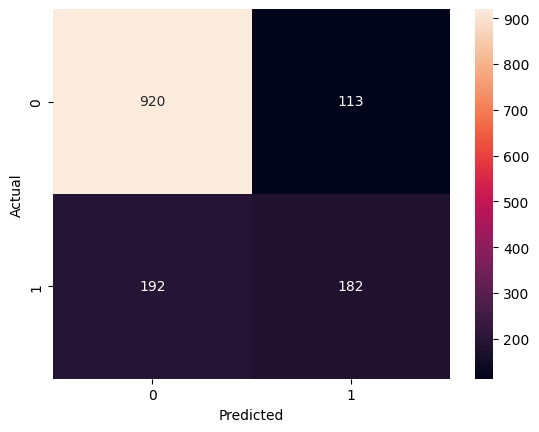

ROC-AUC Score: 0.8182413509274166


In [59]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)


# Model Tuning -->
**Use GridSearchCV for hyperparameter tuning to further improve model accuracy.**

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print('DONE')

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
DONE


In [61]:
!pip install --upgrade scikit-learn==1.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [62]:
import sklearn
print(sklearn.__version__)

1.2.2


In [63]:
import pickle

with open('mymodel.pkl','wb') as f :
    pickle.dump(model,f)

In [64]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [65]:
print(X.shape)


(7032, 26)
